# Revenue Prediction of the Restaurant 

# Download the data

https://www.kaggle.com/c/restaurant-revenue-prediction/data


# Description of data:
FI has provided a dataset with 137 restaurants in the training set, and a test set of 100000 restaurants. The data columns include the open date, location, city type, and three categories of obfuscated data: Demographic data, Real estate data, and Commercial data. The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. 



# Problem Statement: 
Finding a mathematical model to increase the effectiveness of investments in new restaurant sites would allow TFI to invest more in other important business areas, like sustainability, innovation, and training for new employees. Using demographic, real estate, and commercial data, this competition challenges you to predict the annual restaurant sales of 100,000 regional locations.

# Data fields

Id : Restaurant id. 

Open Date : opening date for a restaurant

City : City that the restaurant is in. Note that there are unicode in the names. 

City Group: Type of the city. Big cities, or Other. 

Type: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile

P1, P2 - P37: There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.

Revenue: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. 


#  Required Imports

In [1]:

import math , time, random, datetime 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')
from sklearn.preprocessing import LabelEncoder
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as statmodel
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
%matplotlib inline
plt.rcParams
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.automl import H2OAutoML
h2o.init()
import category_encoders as ce
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)56-b12)
  Starting server from C:\Users\Home\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Home\AppData\Local\Temp\tmptizge7qv
  JVM stdout: C:\Users\Home\AppData\Local\Temp\tmptizge7qv\h2o_Home_started_from_python.out
  JVM stderr: C:\Users\Home\AppData\Local\Temp\tmptizge7qv\h2o_Home_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,05 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.3
H2O cluster version age:,2 months and 21 days
H2O cluster name:,H2O_from_python_Home_hjjhp0
H2O cluster total nodes:,1
H2O cluster free memory:,1.749 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


# Used Algorithms:

 *Baseline model is found out using  H2O autoML
 
 *Created new features and again applied H2O autoML
 
 *Building best model suggested by H2O (GBM)
  
 *Summary of top Kernel

In [2]:

# Import train & test data 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample=pd.read_csv('sampleSubmission.csv')

In [3]:
# View the training data
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715


In [4]:
# View the test data
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [5]:
sample.head()

,Id,Prediction
0,0,4453532.6
1,1,4453532.6
2,2,4453532.6
3,3,4453532.6
4,4,4453532.6


In [6]:
train.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [7]:
len(train)

137

In [8]:
len(test)

100000

In [9]:
import missingno

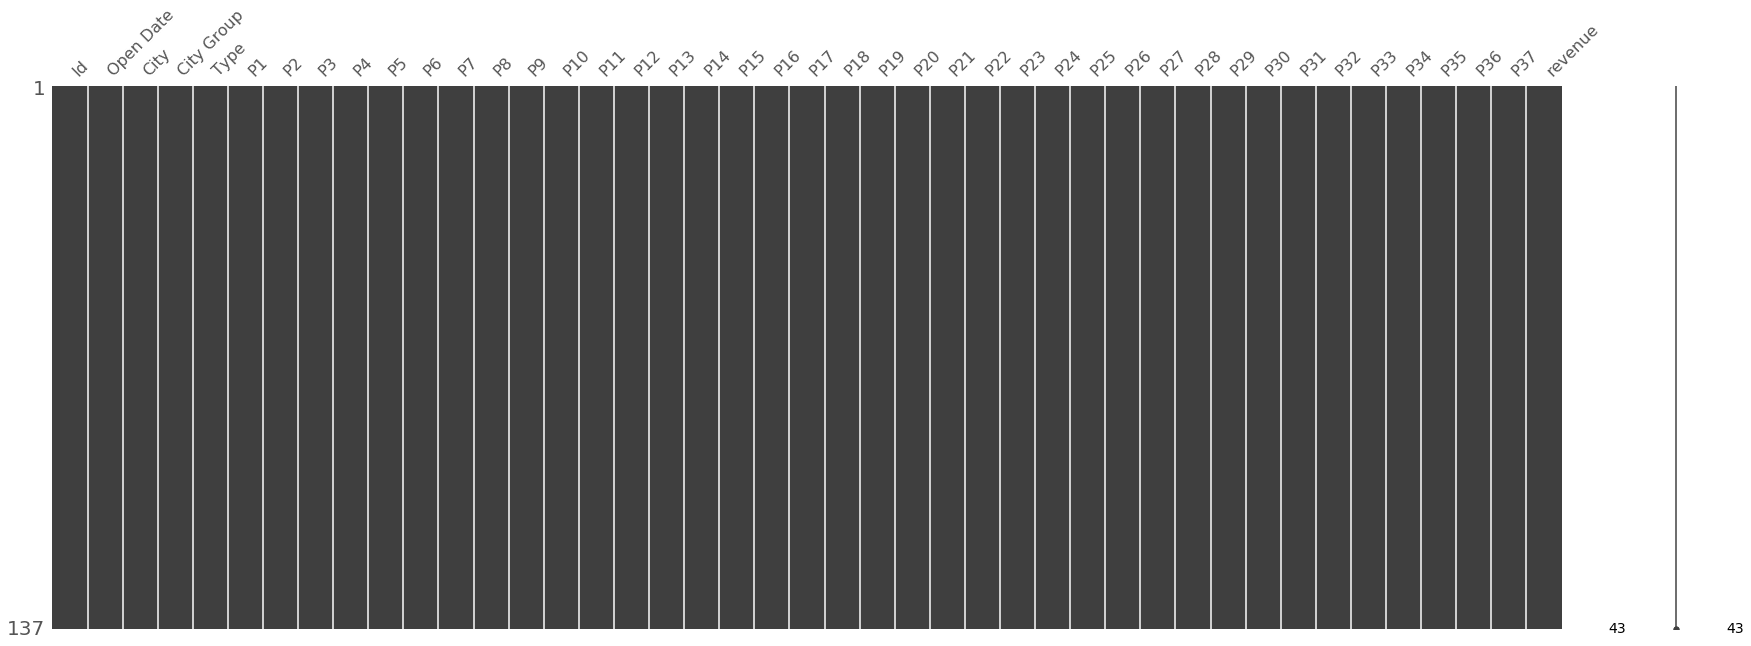

In [10]:
# Plot graphic of missing values
missingno.matrix(train, figsize = (30,10))

Finding missing values from the dataset

In [11]:

def find_missing_values(df, columns):
    """
    Finds number of rows where certain columns are missing values.
    ::param_df:: = target dataframe
    ::param_columns:: = list of columns
    """
    missing_vals = {}
    print("Number of missing or NaN values for each column:")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length-total_column_values
        #missing_vals.append(str(column)+ " column has {} missing or NaN values.".format())
    return missing_vals

missing_values = find_missing_values(train, columns=train.columns)
missing_values

Number of missing or NaN values for each column:


{'Id': 0,
 'Open Date': 0,
 'City': 0,
 'City Group': 0,
 'Type': 0,
 'P1': 0,
 'P2': 0,
 'P3': 0,
 'P4': 0,
 'P5': 0,
 'P6': 0,
 'P7': 0,
 'P8': 0,
 'P9': 0,
 'P10': 0,
 'P11': 0,
 'P12': 0,
 'P13': 0,
 'P14': 0,
 'P15': 0,
 'P16': 0,
 'P17': 0,
 'P18': 0,
 'P19': 0,
 'P20': 0,
 'P21': 0,
 'P22': 0,
 'P23': 0,
 'P24': 0,
 'P25': 0,
 'P26': 0,
 'P27': 0,
 'P28': 0,
 'P29': 0,
 'P30': 0,
 'P31': 0,
 'P32': 0,
 'P33': 0,
 'P34': 0,
 'P35': 0,
 'P36': 0,
 'P37': 0,
 'revenue': 0}

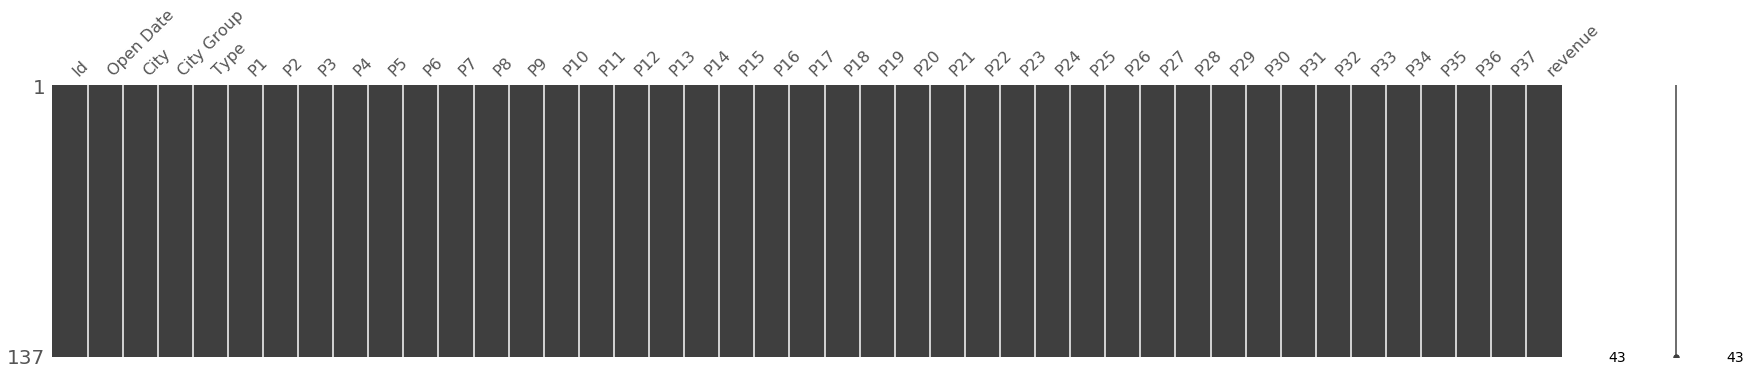

In [12]:
missingno.matrix(train, figsize = (30,5))

 Different data types in the dataset

In [13]:

train.dtypes

Id              int64
Open Date      object
City           object
City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
revenue         int64
dtype: object

In [14]:
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715


### Applying h2o to train.csv

In [15]:
df = h2o.import_file('train.csv')
df.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,1999-07-17 00:00:00,Ä°stanbul,Big Cities,IL,4,5,4,4,2,2,5,4,5,5,3,5,5,1,2,2,2,4,5,4,1,3,3,1,1,1,4,2,3,5,3,4,5,5,4,3,4,5.65375e+06
1,2008-02-14 00:00:00,Ankara,Big Cities,FC,4,5,4,4,1,2,5,5,5,5,1,5,5,0,0,0,0,0,3,2,1,3,2,0,0,0,0,3,3,0,0,0,0,0,0,0,0,6.92313e+06
2,2013-03-09 00:00:00,DiyarbakÄ±r,Other,IL,2,4,2,5,2,3,5,5,5,5,2,5,5,0,0,0,0,0,1,1,1,1,1,0,0,0,0,1,3,0,0,0,0,0,0,0,0,2.05538e+06
3,2012-02-02 00:00:00,Tokat,Other,IL,6,4.5,6,6,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2.67551e+06
4,2009-05-09 00:00:00,Gaziantep,Other,IL,3,4,3,4,2,2,5,5,5,5,2,5,5,2,1,2,1,4,2,2,1,2,1,2,3,3,5,1,3,5,1,3,2,3,4,3,3,4.31672e+06
5,2010-02-12 00:00:00,Ankara,Big Cities,FC,6,6,4.5,7.5,8,10,10,8,8,8,10,8,6,0,0,0,0,0,5,6,3,1,5,0,0,0,0,7.5,5,0,0,0,0,0,0,0,0,5.01732e+06
6,2010-10-11 00:00:00,Ä°stanbul,Big Cities,IL,2,3,4,4,1,5,5,5,5,5,2,5,5,3,4,4,3,4,2,4,1,2,1,5,4,4,5,1,3,4,5,2,2,3,5,4,4,5.16664e+06
7,2011-06-21 00:00:00,Ä°stanbul,Big Cities,IL,4,5,4,5,2,3,5,4,4,4,4,3,4,0,0,0,0,0,3,5,2,4,2,0,0,0,0,3,2,0,0,0,0,0,0,0,0,4.49161e+06
8,2010-08-28 00:00:00,Afyonkarahisar,Other,IL,1,1,4,4,1,2,1,5,5,5,1,5,5,1,1,2,1,4,1,1,1,1,1,4,4,4,2,2,3,4,5,5,3,4,5,4,5,4.9525e+06
9,2011-11-16 00:00:00,Edirne,Other,IL,6,4.5,6,7.5,6,4,10,10,10,10,2,10,7.5,0,0,0,0,0,25,3,3,1,10,0,0,0,0,5,2.5,0,0,0,0,0,0,0,0,5.44423e+06


In [16]:
df.describe()

Rows:137
Cols:43




,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
type,int,time,enum,enum,enum,int,real,real,real,int,int,int,int,int,int,int,int,real,int,int,int,int,int,int,int,int,int,int,int,int,real,real,real,real,int,int,int,int,int,int,int,int,int
mins,0.0,831513600000.0,,,,1.0,1.0,0.0,3.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1149870.0
mean,68.0,1237657296350.3645,,,,4.014598540145983,4.40875912408759,4.3175182481751815,4.3722627737226265,2.007299270072992,3.357664233576642,5.423357664233579,5.153284671532846,5.445255474452556,5.4890510948905105,3.2627737226277373,5.299270072992701,5.0802919708029215,1.416058394160584,1.3868613138686123,1.9416058394160591,1.0364963503649631,1.9416058394160591,4.9051094890510925,4.547445255474453,2.2700729927007313,2.226277372262773,3.4233576642335772,1.3722627737226274,1.2116788321167888,1.4708029197080286,1.1459854014598536,3.222627737226278,3.1350364963503643,2.7299270072992696,1.9416058394160591,2.525547445255475,1.1386861313868615,2.489051094890511,2.0291970802919708,2.2116788321167897,1.1167883211678835,4453532.613138688
maxs,136.0,1390608000000.0,,,,12.0,7.5,7.5,7.5,8.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,7.5,15.0,10.0,15.0,15.0,12.0,25.0,15.0,15.0,5.0,25.0,10.0,10.0,12.5,12.5,12.5,7.5,25.0,15.0,25.0,6.0,24.0,15.0,20.0,8.0,19696939.0
sigma,39.69256857397868,127116648579.15549,,,,2.9103906182641897,1.5149002322301595,1.0323372831631499,1.016462285331371,1.2096204458482704,2.134235040936531,2.2968092565212213,1.8585672492102188,1.8347932566223957,1.8475611441015003,1.9107669887212244,1.941667580380517,1.0365269651197466,2.729582859119749,2.398676642450269,3.5058069964611924,2.0306792514853385,3.3005490259814088,5.604466721336747,3.7080413470149143,2.052629768180595,1.2306902697860198,4.55960948362845,2.3041117315830677,2.1331785760383997,2.6120242483769287,2.067038752821938,2.3088064366403795,1.6808869875261374,5.536647490657986,3.51209344173743,5.230116819034456,1.698539518630745,5.165093228930779,3.4362719321608006,4.168210677141203,1.7907675540962253,2576071.595708188
zeros,1,0,,,,0,0,1,0,0,0,0,0,0,0,0,0,0,88,88,88,88,88,0,0,0,0,0,88,88,88,89,0,2,88,88,88,88,88,88,88,88,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,1999-07-17 00:00:00,Ä°stanbul,Big Cities,IL,4.0,5.0,4.0,4.0,2.0,2.0,5.0,4.0,5.0,5.0,3.0,5.0,5.0,1.0,2.0,2.0,2.0,4.0,5.0,4.0,1.0,3.0,3.0,1.0,1.0,1.0,4.0,2.0,3.0,5.0,3.0,4.0,5.0,5.0,4.0,3.0,4.0,5653753.0
1,1.0,2008-02-14 00:00:00,Ankara,Big Cities,FC,4.0,5.0,4.0,4.0,1.0,2.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6923131.0
2,2.0,2013-03-09 00:00:00,DiyarbakÄ±r,Other,IL,2.0,4.0,2.0,5.0,2.0,3.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2055379.0


## Target variable setting for H2O autoML

In [17]:
y = 'revenue'
# x = ['Open Date','City','City Group','Type']

### Getting  independent variables from training data.

In [18]:
def get_independent_variables(df, targ):
    C = [name for name in df.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x=ints+enums+reals
    return x

In [19]:
X=get_independent_variables(df, y) 
print(X)

['Id', 'P1', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'City', 'City Group', 'Type', 'Open Date', 'P2', 'P3', 'P4', 'P13', 'P26', 'P27', 'P28', 'P29']


### Obtaining best model using h2o autoML model

In [20]:
aml = H2OAutoML(max_models = 30, max_runtime_secs=300, seed = 1,exclude_algos = ['DeepLearning'])
aml.train(x = X, y = y, training_frame = df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [21]:
lb = aml.leaderboard
lb.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_grid_1_AutoML_20190416_162810_model_8,5.4866e+12,2.34235e+06,5.4866e+12,1.57152e+06,0.454092
GBM_grid_1_AutoML_20190416_162810_model_1,5.63991e+12,2.37485e+06,5.63991e+12,1.59402e+06,0.460381
GBM_4_AutoML_20190416_162810,5.64566e+12,2.37606e+06,5.64566e+12,1.60474e+06,0.457986
GBM_2_AutoML_20190416_162810,5.64566e+12,2.37606e+06,5.64566e+12,1.60474e+06,0.457986
GBM_3_AutoML_20190416_162810,5.64566e+12,2.37606e+06,5.64566e+12,1.60474e+06,0.457986
GBM_grid_1_AutoML_20190416_162810_model_2,5.81406e+12,2.41124e+06,5.81406e+12,1.63727e+06,0.468178
GBM_grid_1_AutoML_20190416_162810_model_13,5.86236e+12,2.42123e+06,5.86236e+12,1.60254e+06,0.466722
GBM_grid_1_AutoML_20190416_162810_model_12,5.88249e+12,2.42538e+06,5.88249e+12,1.66223e+06,0.476323
GBM_grid_1_AutoML_20190416_162810_model_10,6.00067e+12,2.44963e+06,6.00067e+12,1.60161e+06,0.465638
GBM_grid_1_AutoML_20190416_162810_model_5,6.15018e+12,2.47995e+06,6.15018e+12,1.59454e+06,0.472244


In [22]:
model = h2o.get_model(aml.leaderboard[0,'model_id'])
model.algo

'gbm'

In [23]:
# making predictions on the test set 
df_test = h2o.import_file('test.csv')
df_test

Parse progress: |█████████████████████████████████████████████████████████| 100%


Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,2011-01-22 00:00:00,NiÄŸde,Other,FC,1,4,4,4,1,2,5,4,5,5,5,3,4,0,0,0,2,0,5,5,3,1,4,0,0,0,0,2,3,0,0,0,0,0,0,0,0
1,2011-03-18 00:00:00,Konya,Other,IL,3,4,4,4,2,2,5,3,4,4,2,4,5,0,0,0,0,0,5,5,3,2,1,0,0,0,0,1,3,0,0,0,0,0,0,0,0
2,2013-10-30 00:00:00,Ankara,Big Cities,FC,3,4,4,4,2,2,5,4,4,5,4,5,5,0,0,0,0,0,5,5,5,5,5,0,0,0,0,2,3,0,0,0,0,0,0,0,0
3,2013-05-06 00:00:00,Kocaeli,Other,IL,2,4,4,4,2,3,5,4,5,4,3,4,5,0,0,0,0,4,4,4,3,2,2,0,0,0,0,2,3,0,4,0,0,0,0,0,0
4,2013-07-31 00:00:00,Afyonkarahisar,Other,FC,2,4,4,4,1,2,5,4,5,4,3,5,4,0,0,0,0,0,1,5,3,1,1,0,0,0,0,5,3,0,0,0,0,0,0,0,0
5,2007-11-29 00:00:00,EskiÅŸehir,Other,FC,4,4.5,5,4,2,6,5,5,10,10,2,5,7.5,0,0,0,0,0,2,5,3,2,3,0,0,0,0,2,3,0,0,0,0,0,0,0,0
6,2008-11-05 00:00:00,Rize,Other,FC,4,2,4,4,2,2,5,4,5,5,3,5,5,1,0,0,1,0,5,5,2,2,3,2,5,0,0,1,3,3,5,4,1,2,0,0,0
7,2013-12-03 00:00:00,Ankara,Big Cities,IL,2,5,4,5,2,3,5,4,4,4,2,4,5,0,0,5,2,0,5,4,2,1,3,2,0,0,1,3,1,3,0,0,0,3,0,4,4
8,2006-05-30 00:00:00,Ä°stanbul,Big Cities,IL,5,4,4,4,1,3,5,4,4,4,2,4,5,0,4,0,3,4,3,5,1,5,2,0,4,0,1,5,1,0,4,0,0,3,5,0,0
9,2012-01-20 00:00:00,Ä°stanbul,Big Cities,IL,15,7.5,6,3,4,8,10,5,8,8,1,6,5,0,8,4,1,9,25,15,1,1,1,3,0,10,2.5,1,2.5,20,2,0,2,24,4,0,3


In [24]:
output = model.predict(df_test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


C:\Users\Home\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset column 'City' has levels not trained on: [Aksaray, Artvin, Batman, Bilecik, DÃ¼zce, Erzincan, Erzurum, Giresun, Hatay, KahramanmaraÅŸ, Kars, KÄ±rÄ±kkale, KÄ±rÅŸehir, Malatya, Manisa, Mardin, Mersin, NevÅŸehir, NiÄŸde, Ordu, Rize, Siirt, Sivas, TanÄ±msÄ±z, Yalova, Zonguldak, Ã‡anakkale, Ã‡ankÄ±rÄ±, Ã‡orum]
  warnings.warn(w)
C:\Users\Home\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset column 'Type' has levels not trained on: [MB]
  warnings.warn(w)


# Model_1: H20 autoML with better features

Initially we  used all the features to obtain our H20 model. Now, we do some data cleaning and feature engineering. We then use these new features to obtain best models using H20. 


#### Data cleaning and feature engineering using pandas

In [25]:
restaurant = pd.read_csv('train.csv')

In [26]:
restaurant.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715


EDA to determine how the Type of city infulences the revenue of the restaurant. 

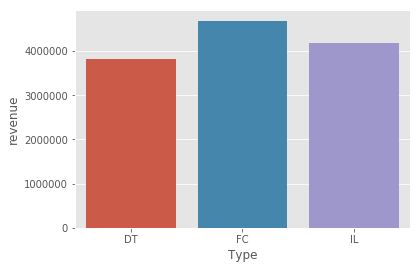

In [27]:
cityPerc = restaurant[["Type", "revenue"]].groupby(['Type'],as_index=False).mean()
sns.barplot(x='Type', y='revenue', data=cityPerc)

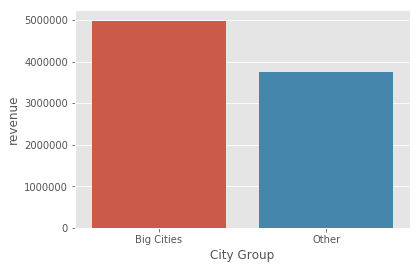

In [28]:
cityPerc = restaurant[["City Group", "revenue"]].groupby(['City Group'],as_index=False).mean()
sns.barplot(x='City Group', y='revenue', data=cityPerc)

According to the plots, we can see that resturants in big cities and fast food restaurants tend to earn higher revenue. 
 Using the date column we can obtain the number of days the restaurant has been in service.

Calculating open days and taking that as a feature

In [29]:
restaurant['Open Date'] = pd.to_datetime(restaurant['Open Date'], format='%m/%d/%Y')   
restaurant['OpenDays']=""

dateLastTrain = pd.DataFrame({'Date':np.repeat(['01/01/2018'],[len(restaurant)]) })
dateLastTrain['Date'] = pd.to_datetime(dateLastTrain['Date'], format='%m/%d/%Y')  


restaurant['OpenDays'] = dateLastTrain['Date'] - restaurant['Open Date']
restaurant['OpenDays'] = restaurant['OpenDays'].astype('timedelta64[D]').astype(int)

restaurant = restaurant.drop('Open Date', axis=1)

In [30]:
restaurant.head()

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays
0,0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,5,3,4,5,5,4,3,4,5653753,6743
1,1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,0,6923131,3609
2,2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,0,0,0,0,0,0,0,0,2055379,1759
3,3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,25,12,10,6,18,12,12,6,2675511,2160
4,4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,5,1,3,2,3,4,3,3,4316715,3159


Target encoding the columns City, City group and Type

Since the number of City in the City column is approx 32. We use Target encoding instead of one-hot encoding


In [31]:
Y = restaurant['revenue']
X= restaurant.drop(['revenue'], axis=1)

In [32]:
# Target with default parameters 
ce_target = ce.TargetEncoder(cols = ['City'])

ce_target.fit(X, Y)

# Must pass the series for y in v1.2.8
X= ce_target.transform(X, Y)

Lets do the same for City group and Type 

In [33]:
# Target with default parameters 
ce_target = ce.TargetEncoder(cols = ['City Group'])

ce_target.fit(X, Y)

# Must pass the series for y in v1.2.8
X= ce_target.transform(X, Y)

ce_target = ce.TargetEncoder(cols = ['Type'])

ce_target.fit(X, Y)

# Must pass the series for y in v1.2.8
X= ce_target.transform(X, Y)

Creating a H20 frame using the new features created using pandas

In [34]:
hf = h2o.H2OFrame(X)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [35]:
bb = restaurant[['revenue','Id']]
bb = pd.DataFrame(data = bb)
hf1 = h2o.H2OFrame(bb)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [36]:
df4 = hf.merge(hf1)

# H20 model using the new features

In [37]:
y = 'revenue'
X=get_independent_variables(df4, y) 
print(X)

['Id', 'P1', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'OpenDays', 'City', 'City Group', 'Type', 'P2', 'P3', 'P4', 'P13', 'P26', 'P27', 'P28', 'P29']


In [38]:
aml2 = H2OAutoML(max_models = 30, max_runtime_secs=300, seed = 1,exclude_algos = ['DeepLearning'])
aml2.train(x = X, y = y, training_frame = df4)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [39]:
lb1 = aml2.leaderboard
lb1.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_grid_1_AutoML_20190416_162844_model_1,5.07141e+12,2.25198e+06,5.07141e+12,1.51839e+06,0.427837
GBM_2_AutoML_20190416_162844,5.25495e+12,2.29237e+06,5.25495e+12,1.54341e+06,0.435918
GBM_3_AutoML_20190416_162844,5.27162e+12,2.296e+06,5.27162e+12,1.5417e+06,0.435284
GBM_4_AutoML_20190416_162844,5.27963e+12,2.29774e+06,5.27963e+12,1.53872e+06,0.435142
GBM_grid_1_AutoML_20190416_162844_model_8,5.38895e+12,2.32141e+06,5.38895e+12,1.55202e+06,0.439392
GBM_grid_1_AutoML_20190416_162844_model_12,5.48279e+12,2.34154e+06,5.48279e+12,1.5592e+06,0.448261
GBM_grid_1_AutoML_20190416_162844_model_2,5.62941e+12,2.37264e+06,5.62941e+12,1.56296e+06,0.442428
GBM_grid_1_AutoML_20190416_162844_model_10,5.64692e+12,2.37633e+06,5.64692e+12,1.52817e+06,0.447048
GBM_grid_1_AutoML_20190416_162844_model_13,5.68186e+12,2.38366e+06,5.68186e+12,1.57397e+06,0.455802
XRT_1_AutoML_20190416_162844,6.08335e+12,2.46645e+06,6.08335e+12,1.65614e+06,0.454416


Using the new features we were able to reduce the RMSE for our GBM model by using the new features. 

In [40]:
model_gbm = h2o.get_model(aml.leaderboard[6,'model_id'])
model_gbm.algo

'gbm'

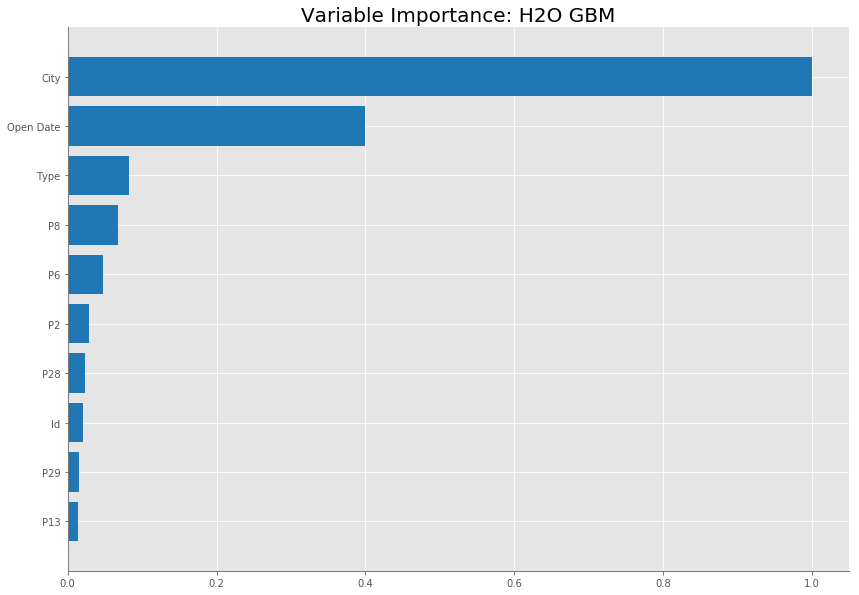

In [41]:
model_gbm.varimp_plot()

We can see that Open date which is one of the features that we engineered turned out to be one of the most important features. The target encoded features were also among the most important features. 

# Predicting output for submission

Executed below steps to convert H2O dataframe in excel file for submission into Kaggle leaderboard.


In [42]:
output_main = model.predict(df_test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


C:\Users\Home\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset column 'City' has levels not trained on: [Aksaray, Artvin, Batman, Bilecik, DÃ¼zce, Erzincan, Erzurum, Giresun, Hatay, KahramanmaraÅŸ, Kars, KÄ±rÄ±kkale, KÄ±rÅŸehir, Malatya, Manisa, Mardin, Mersin, NevÅŸehir, NiÄŸde, Ordu, Rize, Siirt, Sivas, TanÄ±msÄ±z, Yalova, Zonguldak, Ã‡anakkale, Ã‡ankÄ±rÄ±, Ã‡orum]
  warnings.warn(w)
C:\Users\Home\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset column 'Type' has levels not trained on: [MB]
  warnings.warn(w)


In [43]:
op_as_list = h2o.as_list(output_main, use_pandas=False)

In [44]:
prediction = pd.DataFrame(op_as_list)

In [45]:
prediction.to_excel("output_h20.xlsx", sheet_name='Sheet_name_1') 

# Model-2: SKlearn to build GMB model

H20 had given at GBM as the best model. So let's try to recreate the the GBM model using SKlearn. 

Calculating open days and taking that as a feature


In [46]:
train['Open Date'] = pd.to_datetime(train['Open Date'], format='%m/%d/%Y')   
train['OpenDays']=""

dateLastTrain = pd.DataFrame({'Date':np.repeat(['01/01/2018'],[len(train)]) })
dateLastTrain['Date'] = pd.to_datetime(dateLastTrain['Date'], format='%m/%d/%Y')  

train['OpenDays'] = dateLastTrain['Date'] - train['Open Date']
train['OpenDays'] = train['OpenDays'].astype('timedelta64[D]').astype(int)

train = train.drop('Open Date', axis=1)

In [47]:
train.head()

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays
0,0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,5,3,4,5,5,4,3,4,5653753,6743
1,1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,0,6923131,3609
2,2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,0,0,0,0,0,0,0,0,2055379,1759
3,3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,25,12,10,6,18,12,12,6,2675511,2160
4,4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,5,1,3,2,3,4,3,3,4316715,3159


### Creating Dummy variables for the City Group column

In [48]:
#creating dummies for City Group
citygroupDummy = pd.get_dummies(train['City Group'])
train = train.join(citygroupDummy)
citygroupDummy = pd.get_dummies(test['City Group'])
test = test.join(citygroupDummy)

In [49]:
train.head()

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P32,P33,P34,P35,P36,P37,revenue,OpenDays,Big Cities,Other
0,0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,4,5,5,4,3,4,5653753,6743,1,0
1,1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,0,0,0,0,0,0,6923131,3609,1,0
2,2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,0,0,0,0,0,0,2055379,1759,0,1
3,3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,10,6,18,12,12,6,2675511,2160,0,1
4,4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3,2,3,4,3,3,4316715,3159,0,1


In [50]:
Location= pd.get_dummies(train['City Group'],drop_first=True)

In [51]:
train= pd.concat([train,Location],axis=1)

In [52]:
Location.head()

,Other
0,0
1,0
2,1
3,1
4,1


### Comparing the revenues of big cities and other cities

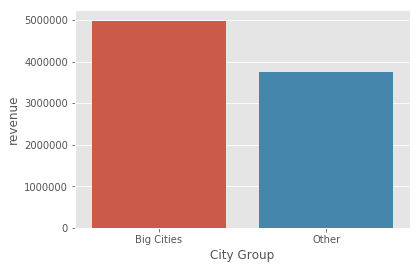

In [53]:
citydist = train[["City Group", "revenue"]].groupby(['City Group'],as_index=False).mean()

sns.barplot(x='City Group', y='revenue', data=citydist)

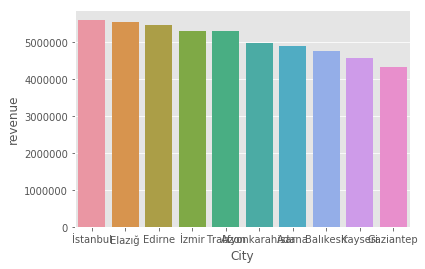

In [54]:
citydist = train[["City", "revenue"]].groupby(['City'],as_index=False).mean()

newDF = citydist.sort_values(["revenue"],ascending= False)
sns.barplot(x='City', y='revenue', data=newDF.head(10))

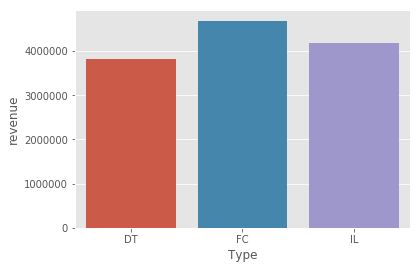

In [55]:
citydist = train[["Type", "revenue"]].groupby(['Type'],as_index=False).mean()
sns.barplot(x='Type', y='revenue', data=citydist)

In [56]:
State = pd.get_dummies(train['Type'],drop_first=False)

In [57]:
train= pd.concat([train,State],axis=1)

In [58]:
State.head()

,DT,FC,IL
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1


In [59]:
train.head()

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P36,P37,revenue,OpenDays,Big Cities,Other,Other,DT,FC,IL
0,0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3,4,5653753,6743,1,0,0,0,0,1
1,1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,0,0,6923131,3609,1,0,0,0,1,0
2,2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,0,0,2055379,1759,0,1,1,0,0,1
3,3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,12,6,2675511,2160,0,1,1,0,0,1
4,4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3,3,4316715,3159,0,1,1,0,0,1


C:\Users\Home\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


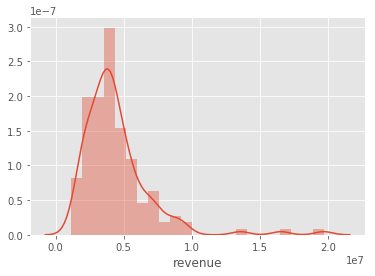

In [60]:
sns.distplot(train['revenue'])

In [61]:
train.head()

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P36,P37,revenue,OpenDays,Big Cities,Other,Other,DT,FC,IL
0,0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3,4,5653753,6743,1,0,0,0,0,1
1,1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,0,0,6923131,3609,1,0,0,0,1,0
2,2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,0,0,2055379,1759,0,1,1,0,0,1
3,3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,12,6,2675511,2160,0,1,1,0,0,1
4,4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3,3,4316715,3159,0,1,1,0,0,1


In [62]:
train.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P36,P37,revenue,OpenDays,Big Cities,Other,Other,DT,FC,IL
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,1.370000e+02,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,2.211679,1.116788,4.453533e+06,3207.262774,0.569343,0.430657,0.430657,0.007299,0.554745,0.437956
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,4.168211,1.790768,2.576072e+06,1471.257507,0.496985,0.496985,0.496985,0.085436,0.498818,0.497956
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,1.149870e+06,1437.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,0.000000,0.000000,2.999068e+06,2203.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,0.000000,0.000000,3.939804e+06,2869.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,2.000000,5.166635e+06,3684.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,20.000000,8.000000,1.969694e+07,7908.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
train.drop(['P1','P2'],axis=1,inplace=True)

In [64]:
train.drop(['P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15','P16','P17','P18','P19','P20','P21','P22','P23','P24','P25','P26','P27','P28','P29','P30','P31','P32','P33','P34','P35','P36','P37','City','City Group','Type'],axis=1,inplace=True)

In [65]:
train.head()

,Id,revenue,OpenDays,Big Cities,Other,Other,DT,FC,IL
0,0,5653753,6743,1,0,0,0,0,1
1,1,6923131,3609,1,0,0,0,1,0
2,2,2055379,1759,0,1,1,0,0,1
3,3,2675511,2160,0,1,1,0,0,1
4,4,4316715,3159,0,1,1,0,0,1


In [66]:
train.corr()

,Id,revenue,OpenDays,Big Cities,Other,Other,DT,FC,IL
Id,1.000000,-0.006277,0.104099,-0.095422,0.095422,0.095422,0.121423,0.187543,-0.208701
revenue,-0.006277,1.000000,0.325821,0.237403,-0.237403,-0.237403,-0.021500,0.100211,-0.096696
OpenDays,0.104099,0.325821,1.000000,0.177907,-0.177907,-0.177907,0.076733,-0.089300,0.076290
Big Cities,-0.095422,0.237403,0.177907,1.000000,-1.000000,-1.000000,0.074578,-0.126652,0.114075
Other,0.095422,-0.237403,-0.177907,-1.000000,1.000000,1.000000,-0.074578,0.126652,-0.114075
Other,0.095422,-0.237403,-0.177907,-1.000000,1.000000,1.000000,-0.074578,0.126652,-0.114075
DT,0.121423,-0.021500,0.076733,0.074578,-0.074578,-0.074578,1.000000,-0.095713,-0.075694
FC,0.187543,0.100211,-0.089300,-0.126652,0.126652,0.126652,-0.095713,1.000000,-0.985308
IL,-0.208701,-0.096696,0.076290,0.114075,-0.114075,-0.114075,-0.075694,-0.985308,1.000000


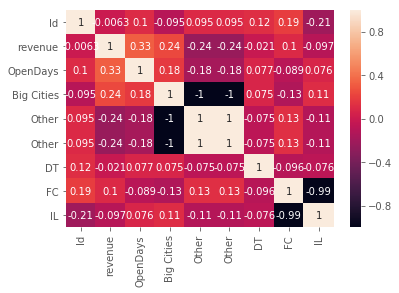

In [67]:
sns.heatmap(train.corr(),annot=True)

In [68]:
X= train[['Id','OpenDays','Big Cities','DT','FC','IL']]

In [69]:
y= train['revenue']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)


In [71]:
lm=LinearRegression()

In [72]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
print(lm.intercept_)

2740385.5451472467


In [74]:
lm.coef_

array([ 3.36992517e+03,  2.71106247e+02,  1.18466530e+06,  0.00000000e+00,
        1.60949744e+05, -1.60949744e+05])

In [75]:
X_train.columns

Index(['Id', 'OpenDays', 'Big Cities', 'DT', 'FC', 'IL'], dtype='object')

#  Predictions

In [76]:
prediction= lm.predict(X_test)

In [77]:
prediction

array([4525929.04774878, 3906100.29751316, 5200969.78963458,
       4862120.19016471, 3551395.08592939, 5920816.32255237,
       4704114.11655227, 3895961.42725335, 4712290.21112012,
       3439842.7059189 , 3360206.61553041, 5645465.13844568,
       4760006.27469395, 3925554.03388053, 5049919.33889707,
       5067792.95468669, 4765366.6004121 , 3660338.75853734,
       4752457.21978709, 3929315.829693  , 5568050.69193762,
       3955472.97473819, 4547479.25519619, 4546348.69029395,
       4363879.89110881, 4114662.0912094 , 6153341.15950726,
       4377677.1762554 , 3477218.92629641, 4989008.97602505,
       4843903.46622185, 3582288.26705896, 5478646.25407983,
       4692237.05994469, 3828519.63963454, 4919906.85928448,
       3828490.5448945 , 3449340.13563505, 4955822.46505872,
       4225466.6888885 , 4617521.92056718, 4763339.27547683,
       5168642.23288001, 4499770.03410727, 5440997.05885928,
       5794258.19657137])

In [78]:
y_test

42      4952255
98      2344689
55      6941173
84      4250553
53      5595267
16     19696939
65      1756069
32      3261924
115     4882985
69      3452382
51      3273041
133     9262754
77      1904842
123     4263629
43      2732645
1       6923131
68      3836721
48      7201784
41      4554237
91      2083447
124     3810007
82      3807496
78      3871344
21      1149870
31      2058644
22      3956086
85      7495092
113     2097022
33      2371202
67      4052733
13      4807746
25      3778621
109     4219263
50      2156098
86      3351383
89      2364478
23      2999068
4       4316715
118     1847826
105     2792031
37      2740687
39      3818055
80      3727364
6       5166635
100     9652350
121     3445076
Name: revenue, dtype: int64

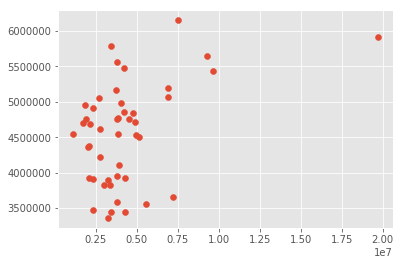

In [79]:
plt.scatter(y_test,prediction)

C:\Users\Home\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


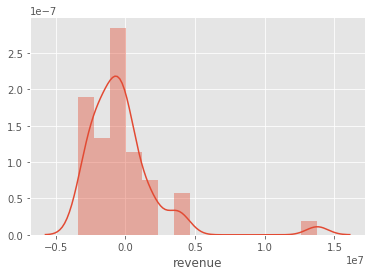

In [80]:
sns.distplot((y_test-prediction))

In [81]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,prediction)

1747957.7279008348

In [82]:
metrics.mean_squared_error(y_test,prediction)

7474653313001.604

In [83]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

2733981.2203088747

In [84]:
X_train.head()

,Id,OpenDays,Big Cities,DT,FC,IL
14,14,2195,0,0,1,0
112,112,7233,1,0,0,1
104,104,3997,0,0,0,1
106,106,3487,0,0,1,0
3,3,2160,0,0,0,1


In [85]:
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P30,P31,P32,P33,P34,P35,P36,P37,Big Cities,Other
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,0,0,0,0,0,0,0,0,0,1
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,0,0,0,0,0,0,0,0,1,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,0,4,0,0,0,0,0,0,0,1
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,0,0,0,0,0,0,0,0,0,1


RMSE value of linear model is 2733981.2203088747

#   Gradient Boosting Machine (GBM) model using sklearn to build
Let's try to recreate the the GBM model using SKlearn. 

In [86]:
rest_train = pd.read_csv('train.csv')

In [87]:
rest_train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715


In [88]:
rest_train.City.unique()

array(['İstanbul', 'Ankara', 'Diyarbakır', 'Tokat', 'Gaziantep',
       'Afyonkarahisar', 'Edirne', 'Kocaeli', 'Bursa', 'İzmir', 'Sakarya',
       'Elazığ', 'Kayseri', 'Eskişehir', 'Şanlıurfa', 'Samsun', 'Adana',
       'Antalya', 'Kastamonu', 'Uşak', 'Muğla', 'Kırklareli', 'Konya',
       'Karabük', 'Tekirdağ', 'Denizli', 'Balıkesir', 'Aydın', 'Amasya',
       'Kütahya', 'Bolu', 'Trabzon', 'Isparta', 'Osmaniye'], dtype=object)

In [89]:
rest_train['Open Date'] = pd.to_datetime(rest_train['Open Date'], format='%m/%d/%Y')   
rest_train['OpenDays']=""

dateLastTrain = pd.DataFrame({'Date':np.repeat(['01/01/2018'],[len(rest_train)]) })
dateLastTrain['Date'] = pd.to_datetime(dateLastTrain['Date'], format='%m/%d/%Y')  


rest_train['OpenDays'] = dateLastTrain['Date'] - rest_train['Open Date']
rest_train['OpenDays'] = rest_train['OpenDays'].astype('timedelta64[D]').astype(int)

rest_train = rest_train.drop('Open Date', axis=1)

In [90]:
rest_train['OpenDays'] = rest_train['OpenDays']/365

In [91]:
#map each of the title groups to a numerical value
city_grup = {"Big Cities": 0, "Other": 1}
type_1 = {"IL": 0, "FC": 1,"DT":2,"MB":3}
#city = {"İstanbul": 0, "Ankara": 1,"Diyarbakır":2,"Tokat":3,"Gaziantep":4,"Afyonkarahisar":5,"Edirne":6,"Kocaeli":7,"Bursa":8,"İzmir":9,"Sakarya":10,"Elazığ":11,"Kayseri":12,""}

rest_train['City Group'] = rest_train['City Group'].map(city_grup)
rest_train['Type'] = rest_train['Type'].map(type_1)



In [92]:
rest_train.head()

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays
0,0,İstanbul,0,0,4,5.0,4.0,4.0,2,2,...,5,3,4,5,5,4,3,4,5653753,18.473973
1,1,Ankara,0,1,4,5.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,0,6923131,9.887671
2,2,Diyarbakır,1,0,2,4.0,2.0,5.0,2,3,...,0,0,0,0,0,0,0,0,2055379,4.819178
3,3,Tokat,1,0,6,4.5,6.0,6.0,4,4,...,25,12,10,6,18,12,12,6,2675511,5.917808
4,4,Gaziantep,1,0,3,4.0,3.0,4.0,2,2,...,5,1,3,2,3,4,3,3,4316715,8.654795


In [93]:
from sklearn.model_selection import train_test_split

predictors = rest_train.drop(['Id','revenue','City'], axis =1) #drop sibsp and parch
#predictors = restaurant_new[["City Group",'Type','OpenDays']]

target = rest_train["revenue"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [94]:
print(x_train.shape,x_val.shape,y_train.shape,y_val.shape)

(106, 40) (31, 40) (106,) (31,)


In [95]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor()
clf.fit(predictors, target)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [96]:
print(x_train.shape,x_val.shape,y_train.shape,y_val.shape)
print(predictors.shape, target.shape)

(106, 40) (31, 40) (106,) (31,)
(137, 40) (137,)


# Alligning of test data according to the requirment

In [97]:
rest_test = pd.read_csv('test.csv')

In [98]:
rest_test['Open Date'] = pd.to_datetime(rest_test['Open Date'], format='%m/%d/%Y')   
rest_test['OpenDays']=""

dateLastTrain = pd.DataFrame({'Date':np.repeat(['01/01/2018'],[len(rest_test)]) })
dateLastTrain['Date'] = pd.to_datetime(dateLastTrain['Date'], format='%m/%d/%Y')  


rest_test['OpenDays'] = dateLastTrain['Date'] - rest_test['Open Date']
rest_test['OpenDays'] = rest_test['OpenDays'].astype('timedelta64[D]').astype(int)
rest_test['OpenDays'] = rest_test['OpenDays']/365


rest_test = rest_test.drop('Open Date', axis=1)

#map each of the title groups to a numerical value
city_grup = {"Big Cities": 0, "Other": 1}
type_1 = {"IL": 0, "FC": 1,"DT":2,"MB":3}
#city = {"İstanbul": 0, "Ankara": 1,"Diyarbakır":2,"Tokat":3,"Gaziantep":4,"Afyonkarahisar":5,"Edirne":6,"Kocaeli":7,"Bursa":8,"İzmir":9,"Sakarya":10,"Elazığ":11,"Kayseri":12,""}

rest_test['City Group'] = rest_test['City Group'].map(city_grup)
rest_test['Type'] = rest_test['Type'].map(type_1)

In [99]:
rest_test.Type.unique()

array([1, 0, 2, 3], dtype=int64)

In [100]:
rest_test.head()

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,OpenDays
0,0,Niğde,1,1,1,4.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6.947945
1,1,Konya,1,0,3,4.0,4.0,4.0,2,2,...,3.0,0,0,0,0,0,0,0,0,6.797260
2,2,Ankara,0,1,3,4.0,4.0,4.0,2,2,...,3.0,0,0,0,0,0,0,0,0,4.175342
3,3,Kocaeli,1,0,2,4.0,4.0,4.0,2,3,...,3.0,0,4,0,0,0,0,0,0,4.660274
4,4,Afyonkarahisar,1,1,2,4.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,4.424658


In [101]:
test_frame = rest_test.drop(['Id','City'], axis =1)
test_frame.head()

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,OpenDays
0,1,1,1,4.0,4.0,4.0,1,2,5,4,...,3.0,0,0,0,0,0,0,0,0,6.947945
1,1,0,3,4.0,4.0,4.0,2,2,5,3,...,3.0,0,0,0,0,0,0,0,0,6.797260
2,0,1,3,4.0,4.0,4.0,2,2,5,4,...,3.0,0,0,0,0,0,0,0,0,4.175342
3,1,0,2,4.0,4.0,4.0,2,3,5,4,...,3.0,0,4,0,0,0,0,0,0,4.660274
4,1,1,2,4.0,4.0,4.0,1,2,5,4,...,3.0,0,0,0,0,0,0,0,0,4.424658


# Prediction using the sklearn model

In [102]:
pxt = clf.predict(test_frame)
pxt = pd.DataFrame(pxt)
pxt.to_excel("rest_revenue_pred.xlsx", sheet_name='Sheet_name_1')

In [103]:
pxt

,0
0,3.726523e+06
1,2.292716e+06
2,3.719571e+06
3,3.699504e+06
4,4.526495e+06
5,4.347890e+06
6,4.563744e+06
7,4.571230e+06
8,3.447457e+06
9,3.776863e+06


RMSE value of this model is 2243259.72

# Contribution:
Performed various data cleaning steps. 

Used target encoding for catagorical variables. 

Performed Linear regression to check RMSE by the model. 

# Summary:

Following tasks have been performed to complete this competition:

Finding missing values from the dataset

Calculating open days and taking that as a feature

Creating dummy variables for the City Group column

Comparing the revenues of big cities and other cities

RMSE using Linear regression

GBM model using sklearn to build

Prediction using the sklearn model


# Conclusion:

After comparison of RMSE values from Linear regression model as well as from GBM model we can conclude that GBM model is better fit for this dataset and can give better prediction. After training data with h2o we got 1960857.64310 as RMSE which is better than that of Linear regression model (2733981.2203088747). 

# Citations:

Dataset & Kernels: https://www.kaggle.com/c/restaurant-revenue-prediction/kernels


Linear Regression Modelling: https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

Gradient Boosting Model: https://towardsdatascience.com/boosting-algorithm-gbm-97737c63daa3

# Contribution:
•By own: 20%

•By external source:80% 


# License:
Copyright 2019 Nikhil Kashid

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.